**Deep Learning - UTS Nomor 1**

**Nama: Janice Ashley Kurniawan**

**NIM: 2602203794**

In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import warnings
import random

import tensorflow as tf
from tensorflow.keras.layers import Dense, Normalization, BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import plot_model

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')
SEED_VALUE=123
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [ ]:
# reading data

df = pd.read_csv("../dataset/Bank_Loan_Granting.csv")

In [ ]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Data Preprocessing

In [ ]:
# checking for missing value

df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

result: tidak ada missing value pada dataset

In [ ]:
# checking for duplicate rows

df.duplicated().sum()

0

result: tidak ada duplicate rows pada dataset

In [ ]:
# dropping useless columns

df.drop(columns = ['ID', 'ZIP Code'], axis = 1, inplace = True)

di sini saya menghilangkan kolom-kolom yang tidak berguna dan tidak diperlukan dalam memprediksi 'Personal Loan', yaitu 'ID' dan 'ZIP Code', karena kedua kolom tersebut tidak tidak membantu tahap training dan hanya berfungsi untuk mengidentifikasi tiap baris

In [ ]:
# membagi columns berdasarkan jenisnya (numerical atau categorical)

num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print('Numerical Columns:', num_cols)
print('Categorical Column:', cat_cols)

Numerical Columns: ['Age', 'Experience', 'Income', 'Family', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
Categorical Column: ['CCAvg']


In [ ]:
# cek numerical column

df[num_cols].describe()

,Age,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# cek categorical column

for i in cat_cols:
    print(f'{i}: {df[i].nunique()}')
    print(df[i].unique())

CCAvg: 108
['1/60' '1/50' '1/00' '2/70' '0/40' '0/30' '0/60' '8/90' '2/40' '0/10'
 '3/80' '2/50' '2/00' '4/70' '8/10' '0/50' '0/90' '1/20' '0/70' '3/90'
 '0/20' '2/20' '3/30' '1/80' '2/90' '1/40' '5/00' '2/30' '1/10' '5/70'
 '4/50' '2/10' '8/00' '1/70' '0/00' '2/80' '3/50' '4/00' '2/60' '1/30'
 '5/60' '5/20' '3/00' '4/60' '3/60' '7/20' '1/75' '7/40' '2/67' '7/50'
 '6/50' '7/80' '7/90' '4/10' '1/90' '4/30' '6/80' '5/10' '3/10' '0/80'
 '3/70' '6/20' '0/75' '2/33' '4/90' '0/67' '3/20' '5/50' '6/90' '4/33'
 '7/30' '4/20' '4/40' '6/10' '6/33' '6/60' '5/30' '3/40' '7/00' '6/30'
 '8/30' '6/00' '1/67' '8/60' '7/60' '6/40' '10/00' '5/90' '5/40' '8/80'
 '1/33' '9/00' '6/70' '4/25' '6/67' '5/80' '4/80' '3/25' '5/67' '8/50'
 '4/75' '4/67' '3/67' '8/20' '3/33' '5/33' '9/30' '2/75']


selanjutnya saya akan mengencode kolom 'CCAvg' dari categorical menjadi numerical dengan menghitung hasil pembagian aslinya dan jika antara pembilang / penyebut nya bernilai nol maka hasilnya akan sama dengan nol

In [ ]:
for index, x in enumerate(df['CCAvg']) :
  string_split = x.split('/')
  upper_number = float(string_split[0])
  lower_number = float(string_split[1])

  if(upper_number == 0 or lower_number == 0) :
    value = 0
  else :
    value = upper_number / lower_number

  df['CCAvg'][index] = value

In [ ]:
df['CCAvg']

0       0.016667
1           0.02
2              0
3       0.028571
4              0
          ...   
4995    0.011111
4996           0
4997           0
4998           0
4999           0
Name: CCAvg, Length: 5000, dtype: object

In [ ]:
# ubah tipe data kolom 'CCAvg' dari object menjadi float

df['CCAvg'] = df['CCAvg'].astype(float)

In [ ]:
# cek apakah semua columns pada dataset sudah baik untuk digunakan dalam mempredict 'Personal Loan'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


# Data Exploration

pada bagian ini, saya akan memvisualisasikan data pada setiap kolom pada dataset untuk mengetahui pola distribusinya

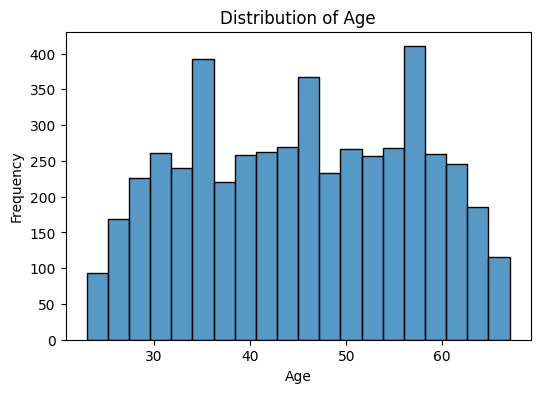

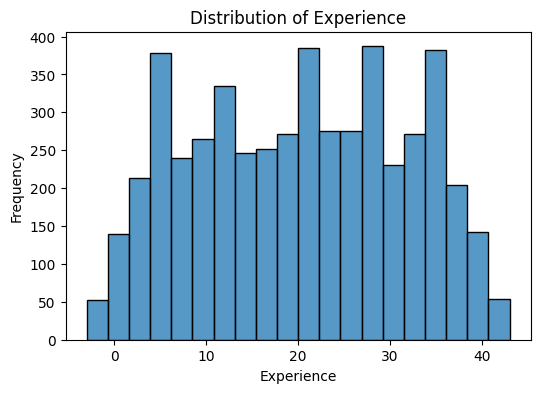

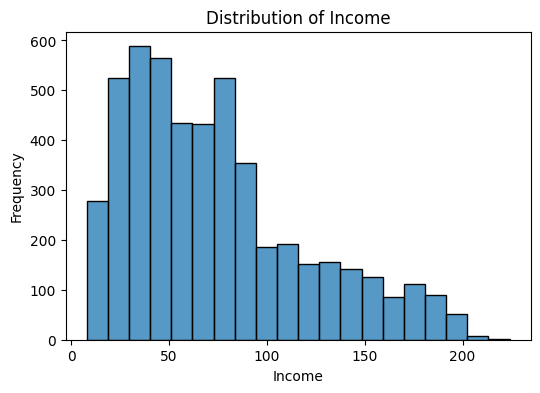

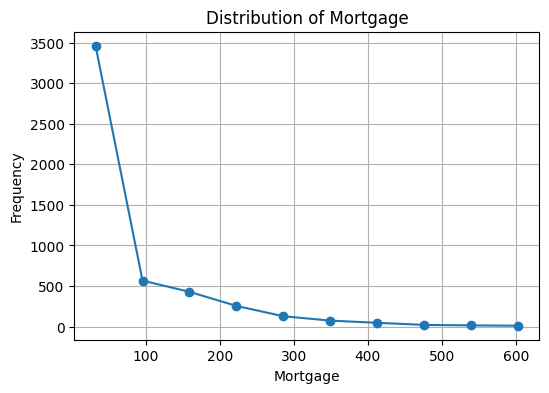

In [ ]:
# histogram kolom 'Age'
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Age', bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# histogram kolom 'Age'
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Experience', bins=20)
plt.title('Distribution of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

# histogram kolom 'Income'
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='Income', bins=20)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# linechart kolom 'Mortgage'
hist_data, bin_edges = np.histogram(df['Mortgage'], bins=10)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
plt.figure(figsize=(6, 4))
plt.plot(bin_centers, hist_data, marker='o', linestyle='-')
plt.title('Distribution of Mortgage')
plt.xlabel('Mortgage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
print('CCAvg: ', df['CCAvg'].nunique())
print(df['CCAvg'].value_counts())

CCAvg:  63
CCAvg
0.000000    2263
0.100000     293
0.025000     246
0.033333     242
0.050000     192
            ... 
0.059701       1
0.044776       1
0.090909       1
0.151515       1
0.026667       1
Name: count, Length: 63, dtype: int64


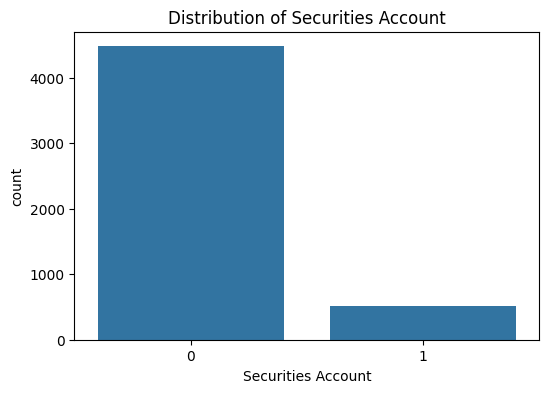

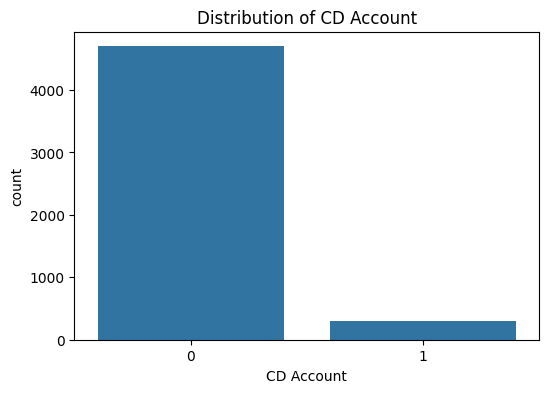

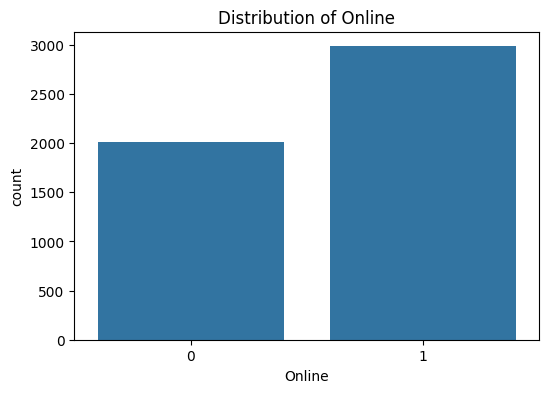

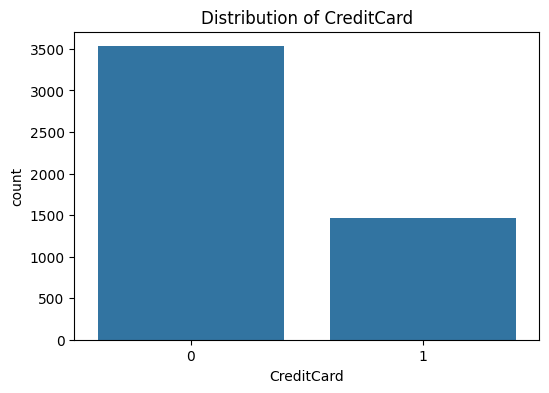

In [ ]:
# countplot kolom 'Securities Account'
plt.figure(figsize=(6, 4))
sns.countplot(x='Securities Account', data=df)
plt.title('Distribution of Securities Account')
plt.show()

# countplot kolom 'CD Account'
plt.figure(figsize=(6, 4))
sns.countplot(x='CD Account', data=df)
plt.title('Distribution of CD Account')
plt.show()

# countplot kolom 'Online'
plt.figure(figsize=(6, 4))
sns.countplot(x='Online', data=df)
plt.title('Distribution of Online')
plt.show()

# countplot kolom 'CreditCard'
plt.figure(figsize=(6, 4))
sns.countplot(x='CreditCard', data=df)
plt.title('Distribution of CreditCard')
plt.show()

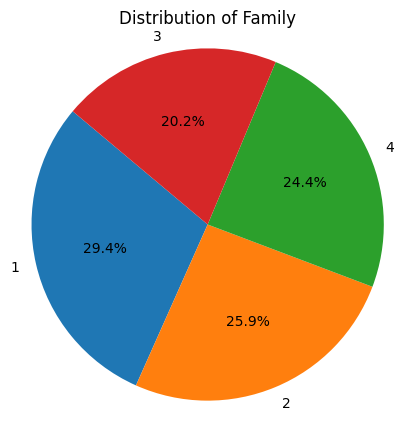

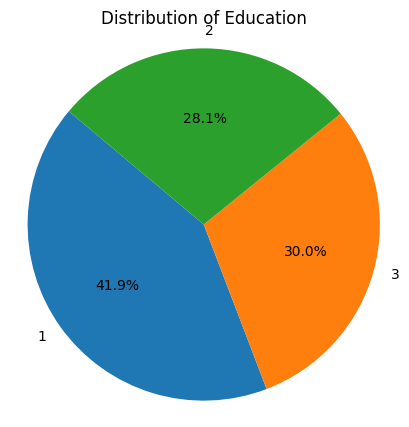

In [ ]:
# piechart kolom 'Family'
category_counts = df['Family'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Family')
plt.show()

# piechart kolom 'Education'
category_counts = df['Education'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Education')
plt.show()

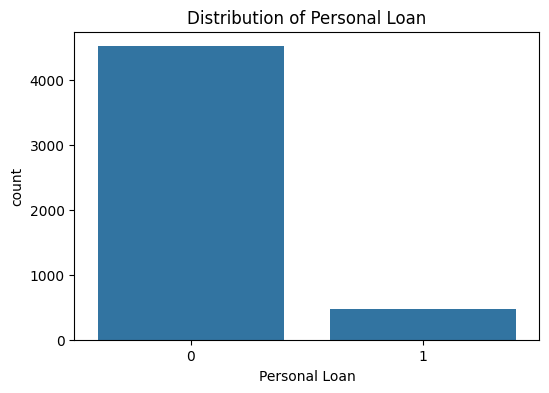

In [ ]:
# visualisasi menggunakan countplot untuk kolom 'Personal Loan' yang akan diprediksi pada model ini
plt.figure(figsize=(6, 4))
sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Personal Loan')
plt.show()

hasil visualisasi kolom 'Personal Loan' menunjukkan adanya class imbalance karena jumlah data dengan class 0 dan class 1 memiliki perbedaan yang sangat jauh (0 > 1), sehingga jika dibiarkan maka model yang dihasilkan akan lebih mengenali pola untuk mempredict nilai 0 daripada 1

In [ ]:
# creating features and label

from tensorflow.keras.utils import to_categorical

x = df.drop('Personal Loan', axis = 1)
y = to_categorical(df['Personal Loan'])

In [ ]:
# splitting data into training set and test set

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 123)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test, test_size = 0.5,random_state = 123)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(4000, 11) (4000, 2)
(500, 11) (500, 2)
(500, 11) (500, 2)


In [ ]:
# # scaling data

# scaling = StandardScaler()
# x_train = scaling.fit_transform(x_train)
# x_val = scaling.transform(x_val)
# x_test = scaling.transform(x_test)

In [ ]:
# create tensor dataset

train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32).shuffle(10)
test_ds = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32).shuffle(10)
val_ds = tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(32).shuffle(10)

# Tantangan dan Kesulitan

**Kualitas Data** (Data Kotor dan Hilang, Outliers) -> kualitas data pada dataset ini dapat dikatakan sudah baik karena tidak ada missing value dan duplicate rows.

**Jenis Data** (Heterogenitas Fitur, Encoding Fitur Kategorikal, Skala dan Normalisasi) -> dari dataset ini hanya terdapat satu feature yang perlu diencode dari categorical menjadi numerical, yaitu column 'CCAvg'.

**Ketidakseimbangan Kelas** (Class Imbalance) -> pada data ini terjadi class imbalance pada kolom 'Personal Loan', di mana jumlah class 0 jauh lebih banyak daripada class 1, sehingga nantinya model akan cenderung memprioritaskan kelas mayoritas dan mengabaikan kelas minoritas, yang dapat menghasilkan model yang tidak seimbang dan menurunkan kinerja model dalam memprediksi kelas minoritas dan meningkatkan jumlah false negative (FN) atau false positive (FP).

# Baseline Architecture

In [ ]:
# sequential API

model = tf.keras.Sequential([
    Dense(11, activation="relu", input_shape=(11,)),
    Dense(22, activation="relu"),
    Dense(22, activation="relu"),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 22)                264       
                                                                 
 dense_2 (Dense)             (None, 22)                506       
                                                                 
 dense_3 (Dense)             (None, 2)                 46        
                                                                 
Total params: 948 (3.70 KB)
Trainable params: 948 (3.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.predict(val_ds)

16/16 [==============================] - 0s 601us/step


array([[1.18550758e-09, 4.14170965e-04],
       [4.61230934e-01, 9.91454542e-01],
       [7.62094080e-01, 9.94850755e-01],
       [8.99050236e-01, 9.82826531e-01],
       [8.95956874e-01, 9.84810889e-01],
       [9.92251277e-01, 8.95201743e-01],
       [8.57369721e-01, 9.65071201e-01],
       [9.59421396e-01, 8.36375833e-01],
       [9.97430265e-01, 1.83128670e-01],
       [1.16990987e-12, 7.83086929e-04],
       [9.89424706e-01, 9.61585522e-01],
       [8.05165396e-13, 1.27976818e-04],
       [7.33182788e-01, 9.87625778e-01],
       [9.53547895e-01, 9.29299176e-01],
       [4.28206629e-18, 1.95637035e-08],
       [8.30814600e-01, 9.87103462e-01],
       [8.43379311e-10, 1.65905061e-04],
       [8.61084223e-01, 9.66720760e-01],
       [7.90531337e-01, 9.89681542e-01],
       [9.07594204e-01, 9.64679062e-01],
       [5.43110967e-01, 9.87812281e-01],
       [4.27612465e-18, 8.40327459e-07],
       [9.77189362e-01, 7.65603483e-01],
       [3.88621265e-19, 1.02670006e-08],
       [8.048664

In [ ]:
x = tf.constant([[i for i in range(0,10)]])

In [ ]:
x

<tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])>

In [ ]:
# train model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
              ,loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 15)

Epoch 1/15
125/125 [==============================] - 1s 2ms/step - loss: 0.8293 - binary_accuracy: 0.8202 - precision: 0.8085 - recall: 0.8393 - f1_score: 0.4982 - val_loss: 0.2891 - val_binary_accuracy: 0.8950 - val_precision: 0.8791 - val_recall: 0.9160 - val_f1_score: 0.6188
Epoch 2/15
125/125 [==============================] - 0s 1ms/step - loss: 0.3057 - binary_accuracy: 0.8859 - precision: 0.8805 - recall: 0.8930 - f1_score: 0.5568 - val_loss: 0.2485 - val_binary_accuracy: 0.8820 - val_precision: 0.8835 - val_recall: 0.8800 - val_f1_score: 0.6830
Epoch 3/15
125/125 [==============================] - 0s 978us/step - loss: 0.2704 - binary_accuracy: 0.8888 - precision: 0.8870 - recall: 0.8910 - f1_score: 0.6013 - val_loss: 0.2156 - val_binary_accuracy: 0.9010 - val_precision: 0.9018 - val_recall: 0.9000 - val_f1_score: 0.7077
Epoch 4/15
125/125 [==============================] - 0s 971us/step - loss: 0.2511 - binary_accuracy: 0.8939 - precision: 0.8932 - recall: 0.8947 - f1_score: 

In [ ]:
history.history

{'loss': [0.8292849063873291,
  0.3057291507720947,
  0.27042633295059204,
  0.25112345814704895,
  0.24293431639671326,
  0.2376580387353897,
  0.2253442257642746,
  0.22443439066410065,
  0.21489550173282623,
  0.21253252029418945,
  0.19048285484313965,
  0.19649477303028107,
  0.1868221014738083,
  0.1752362847328186,
  0.18194645643234253],
 'binary_accuracy': [0.8202499747276306,
  0.8858749866485596,
  0.8887500166893005,
  0.893875002861023,
  0.8985000252723694,
  0.9012500047683716,
  0.9048749804496765,
  0.9014999866485596,
  0.906499981880188,
  0.9103749990463257,
  0.9162499904632568,
  0.9179999828338623,
  0.9257500171661377,
  0.9275000095367432,
  0.9244999885559082],
 'precision': [0.8085260391235352,
  0.8804535269737244,
  0.8870084881782532,
  0.8931869268417358,
  0.8998996615409851,
  0.9024573564529419,
  0.9063990116119385,
  0.9012993574142456,
  0.9083375334739685,
  0.91399747133255,
  0.9181315898895264,
  0.9211586713790894,
  0.9307031035423279,
  0.930

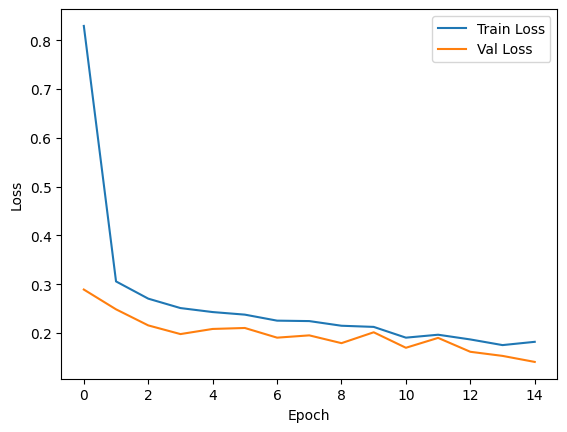

In [ ]:
# plotting

train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# evaluate model

prediction = model.evaluate(test_ds)

16/16 [==============================] - 0s 934us/step - loss: 0.1700 - binary_accuracy: 0.9340 - precision: 0.9289 - recall: 0.9400 - f1_score: 0.7845


**penjelasan grafik dan model evaluation:**

seperti yang dapat dilihat dari grafik di atas, training loss dan validation loss perlahan menurun seiring dengan bertambahnya epoch. yang berarti apabila loss-nya menurun, maka accuracy-nya akan meningkat. dari grafik tersebut kita dapat menyimpukan bahwa model telah berhasil dilatih dengan baik. kita juga dapat mengatakan bahwa model kita tidak overfit karena kedua loss menurun bersamaan secara perlahan. di sini saya menggunakan beberapa metrik untuk mengevaluasi model, antara lain accuracy, precision, recall, dan f1-score. keempat metrik tersebut menghasilkan nilai yang sangat bagus dan akan dijelaskan lebih lanjut di bawah ini.

**accuracy** -> mengukur seberapa sering model membuat prediksi yang benar secara keseluruhan, dalam architecture ini nilai binary accuracy yang dihasilkan yaitu 0.9340.

**precision** -> mengukur seberapa sering model membuat prediksi positif yang benar dari semua prediksi positif yang dilakukan, dalam architecture ini nilai precision yang dihasilkan yaitu 0.9289.

**recall** -> mengukur seberapa sering model dapat mendeteksi semua instance positif yang sebenarnya, dalam architecture ini nilai precision yang dihasilkan yaitu 0.9400.

**f1-score** -> rata-rata harmonis / keseimbangan antara precision dan recall, dalam architecture ini nilai precision yang dihasilkan yaitu 0.7845.

# Architectural Modifications

pada bagian modifikasi arsitektur ini, saya melakukan beberapa hal untuk  mendapatkan dan meningkatkan nilai akurasi yang lebih optimal, antara lain:

*   membuat class weights untuk memberikan bobot yang lebih tinggi pada kelas minoritas, sehingga model akan lebih memperhatikan kelas minoritas tersebut selama pelatihan, dengan harapan dapat meningkatkan kemampuan model untuk mengenali dan memprediksi kelas minoritas dengan lebih baik
*   menambahkan layer normalization untuk meningkatkan stabilitas dan kinerja model, dengan tujuan untuk mengurangi masalah internal covariate shift dan mempercepat konvergensi selama pelatihan
*   menambahkan jumlah epoch untuk meningkatkan konvergensi, mengatasi overfitting, dan memasitkan kestabilan model

In [ ]:
class_weights = {0: 1, 1: 3}

In [ ]:
model = tf.keras.Sequential([
    Dense(11, activation="relu", input_shape=(11,)),
    BatchNormalization(),
    Dense(22, activation="relu"),
    BatchNormalization(),
    Dense(22, activation="relu"),
    BatchNormalization(),
    Dense(11, activation="relu", input_shape=(11,)),
    BatchNormalization(),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 batch_normalization (Batch  (None, 11)                44        
 Normalization)                                                  
                                                                 
 dense_5 (Dense)             (None, 22)                264       
                                                                 
 batch_normalization_1 (Bat  (None, 22)                88        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 22)                506       
                                                                 
 batch_normalization_2 (Bat  (None, 22)               

In [ ]:
model.predict(val_ds)

16/16 [==============================] - 0s 667us/step


array([[7.73548365e-01, 4.14517015e-01],
       [9.44525898e-01, 2.79428035e-01],
       [8.94835413e-01, 2.88452029e-01],
       [8.01681995e-01, 4.53416735e-01],
       [9.81493711e-01, 1.98964670e-01],
       [9.03593361e-01, 3.36229563e-01],
       [8.83316875e-01, 3.35178077e-01],
       [6.67824864e-01, 4.78621632e-01],
       [5.85936427e-01, 4.93311733e-01],
       [9.36995566e-01, 2.81111240e-01],
       [9.99935091e-01, 9.44606552e-04],
       [9.41758692e-01, 3.08900535e-01],
       [9.26668286e-01, 3.36901695e-01],
       [5.83090127e-01, 4.94533569e-01],
       [9.65207994e-01, 3.59666586e-01],
       [9.97681081e-01, 1.25435844e-01],
       [9.92467403e-01, 7.47162402e-02],
       [6.59678280e-01, 4.80494410e-01],
       [9.97570693e-01, 1.40068516e-01],
       [9.07613158e-01, 2.42377043e-01],
       [5.91965616e-01, 4.90038633e-01],
       [9.60443556e-01, 2.81784624e-01],
       [9.43454385e-01, 2.82249987e-01],
       [9.59976017e-01, 1.68978944e-01],
       [9.959934

In [ ]:
x = tf.constant([[i for i in range(0,10)]])

In [ ]:
x

<tf.Tensor: shape=(1, 10), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])>

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
              ,loss='binary_crossentropy'
              , metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.F1Score()])

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 20)

Epoch 1/20
125/125 [==============================] - 2s 3ms/step - loss: 0.6202 - binary_accuracy: 0.7166 - precision_1: 0.7209 - recall_1: 0.7070 - f1_score: 0.6051 - val_loss: 0.5486 - val_binary_accuracy: 0.8490 - val_precision_1: 0.8156 - val_recall_1: 0.9020 - val_f1_score: 0.7070
Epoch 2/20
125/125 [==============================] - 0s 1ms/step - loss: 0.4148 - binary_accuracy: 0.8611 - precision_1: 0.8559 - recall_1: 0.8685 - f1_score: 0.7064 - val_loss: 0.3507 - val_binary_accuracy: 0.8980 - val_precision_1: 0.8857 - val_recall_1: 0.9140 - val_f1_score: 0.5671
Epoch 3/20
125/125 [==============================] - 0s 1ms/step - loss: 0.2984 - binary_accuracy: 0.8931 - precision_1: 0.8838 - recall_1: 0.9053 - f1_score: 0.6779 - val_loss: 0.2396 - val_binary_accuracy: 0.9140 - val_precision_1: 0.9107 - val_recall_1: 0.9180 - val_f1_score: 0.5971
Epoch 4/20
125/125 [==============================] - 0s 1ms/step - loss: 0.2409 - binary_accuracy: 0.8999 - precision_1: 0.8912 - recal

In [ ]:
history.history

{'loss': [0.6202151775360107,
  0.4147808253765106,
  0.29835546016693115,
  0.24086779356002808,
  0.21645121276378632,
  0.20598138868808746,
  0.19767431914806366,
  0.1927797943353653,
  0.18574973940849304,
  0.17322596907615662,
  0.1537960171699524,
  0.14293520152568817,
  0.1344693899154663,
  0.12509135901927948,
  0.1191742867231369,
  0.11366526037454605,
  0.10997284203767776,
  0.10465778410434723,
  0.10289062559604645,
  0.0991760641336441],
 'binary_accuracy': [0.7166249752044678,
  0.8611249923706055,
  0.8931249976158142,
  0.8998749852180481,
  0.9043750166893005,
  0.9042500257492065,
  0.9073749780654907,
  0.9089999794960022,
  0.9132500290870667,
  0.9265000224113464,
  0.9390000104904175,
  0.9436249732971191,
  0.9486250281333923,
  0.9521250128746033,
  0.9556249976158142,
  0.9581249952316284,
  0.9588750004768372,
  0.9618750214576721,
  0.9627500176429749,
  0.9643750190734863],
 'precision_1': [0.7208768725395203,
  0.8558758497238159,
  0.883817434310913

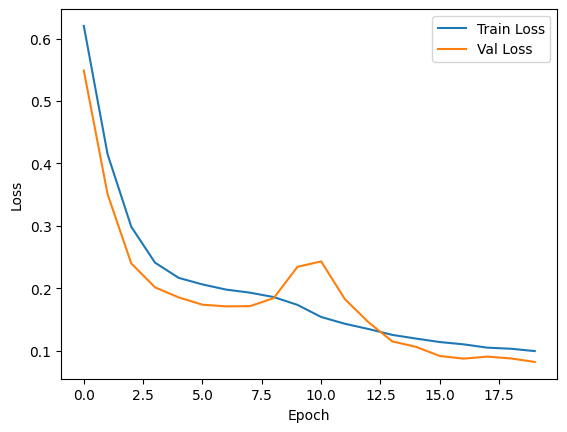

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(train_loss,label="Train Loss")
plt.plot(val_loss,label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
prediction = model.evaluate(test_ds)

16/16 [==============================] - 0s 1ms/step - loss: 0.1055 - binary_accuracy: 0.9580 - precision_1: 0.9580 - recall_1: 0.9580 - f1_score: 0.8864


**penjelasan grafik dan model evaluation setelah architectural modifications:**

setelah saya melakukan modifikasi pada artitektur tersebut, grafik yang dihasilkan lebih bagus daripada sebelumnya, namun kita tidak dapat melihat perbedaan yang terlalu signifikan. untuk lebih jelasnya, kita dapat melihat perbedaannya melalui metrik evaluasi. keempat metrik yang saya gunakan menghasilkan nilai yang lebih bagus dan mengalami peningkatan daripada sebelumnya.

**accuracy** -> nilai binary accuracy yang dihasilkan model ini setelah dilakukan modifikasi pada arsitekturnya adalah 0.9580 dengan kenaikan sebesar 0.0024 dibandingkan dengan sebelumnya.

**precision** -> nilai precision yang dihasilkan model ini setelah dilakukan modifikasi pada arsitekturnya adalah 0.9580 dengan kenaikan sebesar 0.0291 dibandingkan dengan sebelumnya.

**recall** -> nilai recall yang dihasilkan model ini setelah dilakukan modifikasi pada arsitekturnya adalah 0.9580 dengan kenaikan sebesar 0.0180 dibandingkan dengan sebelumnya.

**f1-score** -> nilai f1-score yang dihasilkan model ini setelah dilakukan modifikasi pada arsitekturnya adalah 0.8864 dengan kenaikan sebesar 0.1019 dibandingkan dengan sebelumnya.

# Presentation Video

link video: https://drive.google.com/file/d/1HzQFX5UxIT3HtYsOGZhAQl42a1cTYtiA/view?usp=sharing